# Photo-Reverberation Mapping Tutorial

## Imports

In [1]:
import photRM

import os
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.style.use('bmh')

import seaborn as sns
sns.set_theme()
sns.set_context('paper')

In [2]:
np.random.seed(42)

## Artificial lcs

### Generating

In [3]:
x_band_43, y_band_43, line_response_43 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=43)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 43.00
MBH = 3.14e+06 M_sun
tau_DRW = 17.31 days
sigma_DRW = 0.05 mag^2/day
Time-lag = 9.86 days


In [42]:
art_lc_43 = {'logL': 43, 'M_BH': 3.14e6, 'tau_DRW': 17.31, 'sigma_DRW': 0.05, 'time-lag': 9.86}

In [5]:
x_band_44, y_band_44, line_response_44 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=44)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


In [43]:
art_lc_44 = {'logL': 44, 'M_BH': 3.46e7, 'tau_DRW': 31.98, 'sigma_DRW': 0.03, 'time-lag': 33.65}

In [6]:
x_band_45, y_band_45, line_response_45 = photRM.lc_two_bands(5000, osc=True, A=0.14, noise=0.00005, z=0.1, 
                                                             lag='random', wl=0.2, wc=0.8, lum=45)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


In [44]:
art_lc_45 = {'logL': 45, 'M_BH': 6.76e7, 'tau_DRW': 59.10, 'sigma_DRW': 0.01, 'time-lag': 114.82}

### Saving

In [7]:
x_band_43_cut = x_band_43[:1000]
y_band_43_cut = y_band_43[:1000]
x_band_44_cut = x_band_44[:1000]
y_band_44_cut = y_band_44[:1000]
x_band_45_cut = x_band_45[:1000]
y_band_45_cut = y_band_45[:1000]

In [73]:
'''np.savetxt('x_band_43', np.c_[x_band_43_cut.t, x_band_43_cut.flux, x_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43', np.c_[y_band_43_cut.t, y_band_43_cut.flux, y_band_43_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band_44', np.c_[x_band_44_cut.t, x_band_44_cut.flux, x_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_44', np.c_[y_band_44_cut.t, y_band_44_cut.flux, y_band_44_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('x_band_45', np.c_[x_band_45_cut.t, x_band_45_cut.flux, x_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_45', np.c_[y_band_45_cut.t, y_band_45_cut.flux, y_band_45_cut.err], 
           fmt=['%.1f','%.7e','%.7e'])''';

### Plotting

In [9]:
def plot_artificial_lc(x_band, y_band, line_response, flux_units=None, savefig=False, save_filename=None):
    '''
    Plots the artificial lcs as in the notebook PhotoReverberationMappingAGN.ipynb
    written by I. Jankov et al.
    '''
    fig, (ax1, fig, ax3) = plt.subplots(3,1, sharex=True, figsize=(15,9), tight_layout=True)
    ax1.errorbar(y_band['t'], y_band['flux'], yerr = y_band['err'] ,fmt='ko', markersize=2, alpha=0.6, 
                 capsize=3, label='continuum + line LC (Y-band)')
    fig.errorbar(x_band['t'], x_band['flux'], yerr=x_band['err'], fmt='bo', markersize=2, alpha=0.6,
                 capsize=3, label='continuum LC (X-band)')
    ax3.plot(line_response['t'], line_response['flux'], 'ro-', markersize=2, alpha=0.6, label='line response')

    loc = plticker.MultipleLocator(100)

    for ax in [ax1, fig, ax3]:
        ax.legend(fontsize=13,markerscale=2)

        if flux_units==None:
            ax.set_ylabel('Flux', fontsize=18, labelpad=10)
        else:
            ax.set_ylabel('Flux'+flux_units, fontsize=18, labelpad=10)
        
        ax.tick_params(direction='in', pad=5, labelsize=13)
        ax.set_xlim(0, 1000)
        ax.xaxis.set_major_locator(loc)

    ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)

    if savefig:
        plt.savefig(save_filename+'.pdf')

    plt.show()

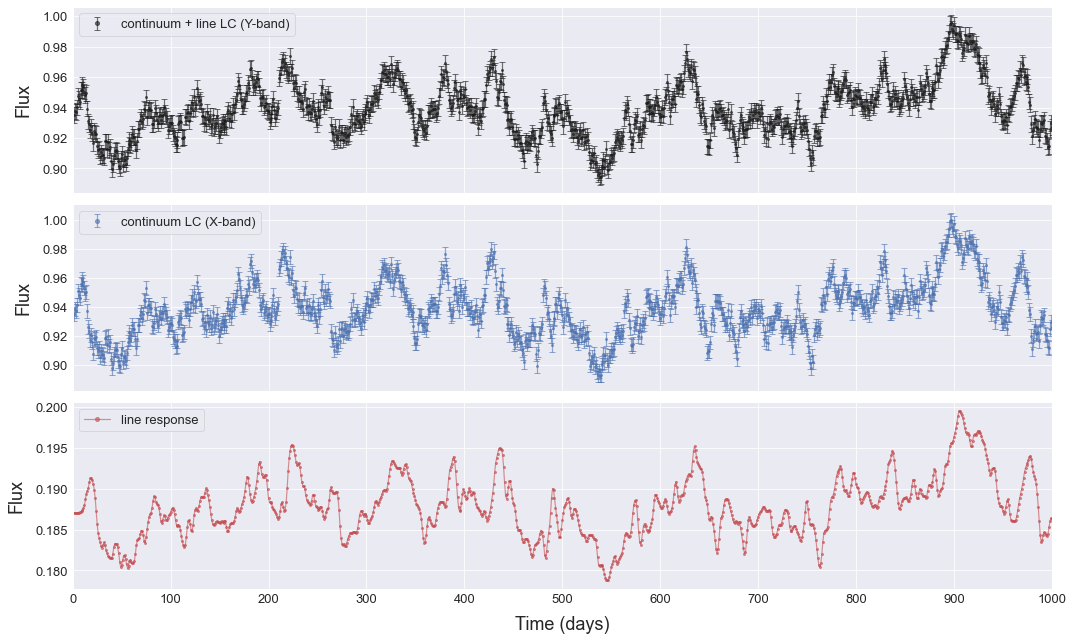

In [10]:
plot_artificial_lc(x_band_43_cut, y_band_43_cut, line_response_43[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL43')

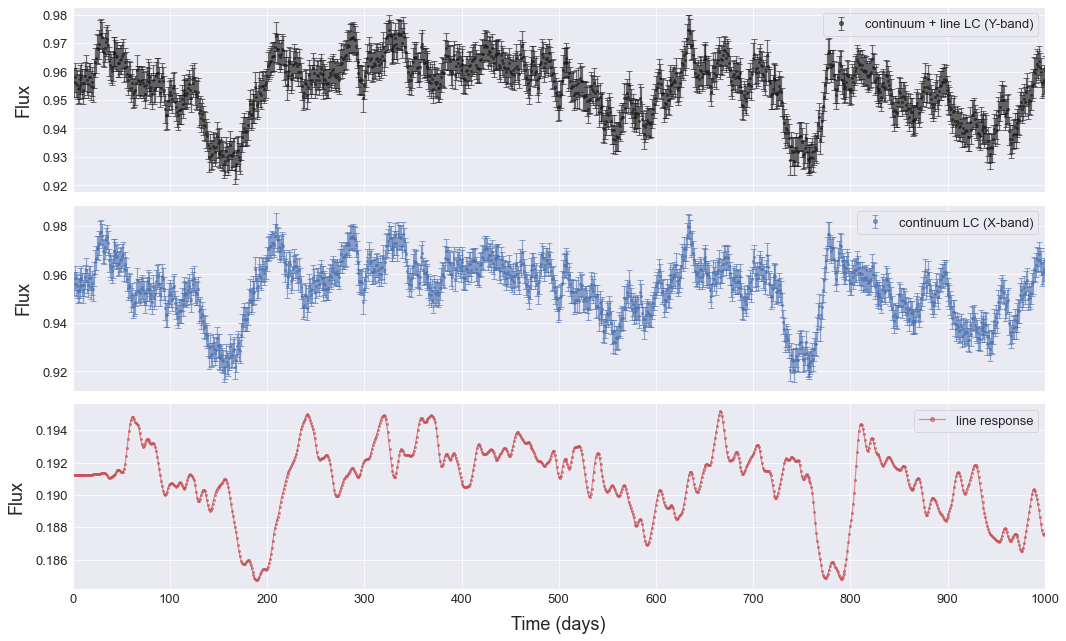

In [11]:
plot_artificial_lc(x_band_44_cut, y_band_44_cut, line_response_44[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL44')

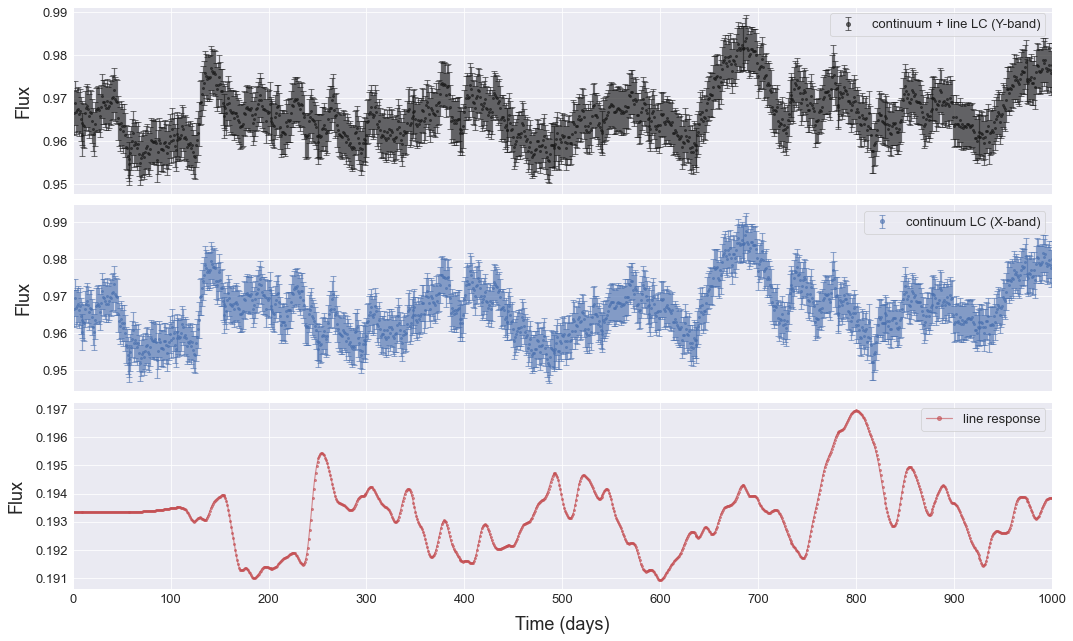

In [12]:
plot_artificial_lc(x_band_45_cut, y_band_45_cut, line_response_45[:1000])  # , 
                   # savefig=True, save_filename='art_lcs_logL45')

### Time-Lags with PLIKE

In [78]:
def do_zdcf(object_name, lc1_name, lc2_name=None, acf_or_ccf='ACF', uniform='n'):

    '''
    Computes z-DCF with PLIKE for the light-curves
    Based on function written by Paula Sánchez-Sáez (ESO)

    Parameters:
    object_name: artificial or name of the real object (str)
    lc1_name and lc2_name: filename of the txt file of the lightcurves (str)
    lc2_name: if CCF is done. Default: None
    acf_or_ccf: whether to perform ACF or CCF (str). Default: ACF
    uniform: y or n, if the lcs are uniformly sampled (str). Default: n
    '''

    if acf_or_ccf == 'ACF':
        name = object_name+'_'+lc1_name+'_'+acf_or_ccf
        print('########## computing Z-DCF for source ' + acf_or_ccf + 'for' + object_name + ' at ' + lc1_name)
    elif acf_or_ccf == 'CCF':
        name = object_name+'_'+lc1_name+'_'+lc2_name+'_'+acf_or_ccf
        print('########## computing Z-DCF for source ' + acf_or_ccf + 'for' + object_name + ' at ' + lc1_name + ' and ' + lc2_name)

    #running zdcf (v2.2)
    zdcf_path = '/Users/nicolasgalvarinoguerravaras/Documents/ESO_Summer_Research_Programme/Code+Data/ZDCF/zdcf.exe'
    if acf_or_ccf == 'ACF':
        cmd1 = zdcf_path+' << EOF \n1 \nCC_'+name+' \n'+uniform+' \n11 \nn \n100 \n'+lc1_name+' \n EOF'
    elif acf_or_ccf == 'CCF':
        cmd1 = zdcf_path+' << EOF \n2 \nCC_'+name+' \n'+uniform+' \n11 \nn \n100 \n'+lc1_name+' \n'+lc2_name+' \n EOF'
    else:
        print('Error: acf_or_ccf must be ACF or CCF')
        return None
    # 1: auto-correlation
    # 2: cross-correlation
    # dcf file prefix
    # n: non-uniform sampling
    # 11: min points per bin
    # n: don't omit zero lag points
    # 100: MC runs
    os.system(cmd1)

    #running plike (v4.0)
    plike_path = '/Users/nicolasgalvarinoguerravaras/Documents/ESO_Summer_Research_Programme/Code+Data/ZDCF/plike.exe'
    cmd3 = plike_path+' << EOF \nCC_'+name+'.dcf \n'+str(lag_lowlimit)+' \n'+str(lag_uplimit)+' \n EOF'
    os.system(cmd3)

    try:
        # loading plike results
        aux = np.genfromtxt('CC_'+name+'.dcf.plike.out')
        lag_peak = aux[0]
        lag_lowerr = aux[1]
        lag_uperr = aux[2]

        # loading zdcf results to obtain r in the peak
        aux2 = np.loadtxt('CC_'+name+'.dcf', dtype='str').transpose()
        lags = aux2[0].astype(np.float)
        rs = aux2[3].astype(np.float)

        r_peak = rs[np.where(lags==lag_peak)][0]

    except:
        print('problems computing peak from plike for source ' + acf_or_ccf + 'for' + object_name + ' at ' + lc1_name + ' and ' + lc2_name)
        lag_peak = -8888
        lag_lowerr = -8888
        lag_uperr = -8888
        lags = -8888
        rs = -8888
        r_peak = -8888

    # deleting plike.out
    cmd = 'rm CC_'+name+'.dcf.plike.out'
    os.system(cmd)

    # moving zdcf ".dcf" output to zdcf_stat
    cmd='mv CC_'+name+'.dcf  ' + dcf_files
    os.system(cmd)

    # deleting other zdcf outputs
    cmd='rm CC_'+name+'.lc1'
    os.system(cmd)

    cmd='rm CC_'+name+'.lc2'
    os.system(cmd)

    return (object_name, lc1_name, lc2_name, lag_peak, lag_lowerr, lag_uperr, r_peak)

In [37]:
# general setup
dcf_files = './output_dcf_files/'

lag_lowlimit = -500
lag_uplimit = 500

n_cores = 1

#### ACF

In [40]:
'''auto_corr = True
out_file_name = 'output_ZDCF/ZDCF_output_ACF_art_lcs.csv'

results = []

results.append(do_zdcf('artificial', 'x_band_43', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_44', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_45', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_43', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_44', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_45', acf_or_ccf='ACF', uniform='y'))

head = 'object_name', 'lc_1', 'lc_2', 'lag_peak', 'lag_lowerr', 'lag_uperr', 'r_peak'

art_lcs_zdcf_plike_df = pd.DataFrame(results, columns=head)

art_lcs_zdcf_plike_df.to_csv(out_file_name)

print("File %s writen" % (out_file_name))
print(results)'''

########## computing Z-DCF for source ACFforartificial at x_band_43
ZDCF V2.2 begins:
Auto-correlation or cross-correlation? (1/2):
Enter output files prefix:
Uniform sampling of light curve? (y/n):
Enter minimal number of points per bin (0 for default):
Omit zero-lag points? (y/n):
How many Monte Carlo runs for error estimation?

ZDCF PARAMETERS:
Autocorrelation?  T
Uniform sampling? T
Omit zero lags?   F
Minimal # in bin:         11
# of Monte Carlo:        100
Monte Carlo seed:     123456
Enter name of 1st light curve file:

 CC_artificial_x_band_43_ACF.lc1  written (contains         1000  points) ...
 CC_artificial_x_band_43_ACF.lc2  written (contains         1000  points) ...

Binning with minimum of  11 points per bin and resolution of 1.00E-03 .

       990 bins actually used,       -445 inter-dependent pairs discarded.

  tau       -sig(tau)  +sig(tau)   dcf        -err(dcf)  +err(dcf) (#bin)

  0.000E+00  0.000E+00  0.000E+00  1.000E+00  6.431E-09  6.230E-09 (1000)
  1.000E+00

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_6433/526376109.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = aux2[0].astype(np.float)
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_6433/526376109.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rs = aux2[3].astype(np.float)



       990 bins actually used,       -445 inter-dependent pairs discarded.

  tau       -sig(tau)  +sig(tau)   dcf        -err(dcf)  +err(dcf) (#bin)

  0.000E+00  0.000E+00  0.000E+00  1.000E+00  6.431E-09  6.230E-09 (1000)
  1.000E+00  0.000E+00  0.000E+00  9.632E-01  2.320E-03  2.251E-03 ( 999)
  2.000E+00  0.000E+00  0.000E+00  9.281E-01  4.458E-03  4.329E-03 ( 998)
  3.000E+00  0.000E+00  0.000E+00  8.951E-01  6.390E-03  6.211E-03 ( 997)
  4.000E+00  0.000E+00  0.000E+00  8.644E-01  8.130E-03  7.910E-03 ( 996)
  5.000E+00  0.000E+00  0.000E+00  8.329E-01  9.846E-03  9.589E-03 ( 995)
  6.000E+00  0.000E+00  0.000E+00  7.998E-01  1.158E-02  1.129E-02 ( 994)
  7.000E+00  0.000E+00  0.000E+00  7.669E-01  1.325E-02  1.293E-02 ( 993)
  8.000E+00  0.000E+00  0.000E+00  7.351E-01  1.478E-02  1.444E-02 ( 992)
  9.000E+00  0.000E+00  0.000E+00  7.066E-01  1.610E-02  1.575E-02 ( 991)
  1.000E+01  0.000E+00  0.000E+00  6.818E-01  1.721E-02  1.684E-02 ( 990)
  1.100E+01  0.000E+00  0.000E+00 

#### CCF

In [41]:
'''auto_corr = False
out_file_name = 'output_ZDCF/ZDCF_output_CCF_art_lcs.csv'

results = []

results.append(do_zdcf('artificial', 'x_band_43', lc2_name='y_band_43', acf_or_ccf='CCF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_44', lc2_name='y_band_44', acf_or_ccf='CCF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_45', lc2_name='y_band_45', acf_or_ccf='CCF', uniform='y'))

head = 'object_name', 'lc_1', 'lc_2', 'lag_peak', 'lag_lowerr', 'lag_uperr', 'r_peak'

art_lcs_zdcf_plike_df = pd.DataFrame(results, columns=head)

art_lcs_zdcf_plike_df.to_csv(out_file_name)

print("File %s writen" % (out_file_name))
print(results)'''

########## computing Z-DCF for source CCFforartificial at x_band_43 and y_band_43
ZDCF V2.2 begins:
Auto-correlation or cross-correlation? (1/2):
Enter output files prefix:
Uniform sampling of light curve? (y/n):
Enter minimal number of points per bin (0 for default):
Omit zero-lag points? (y/n):
How many Monte Carlo runs for error estimation?

ZDCF PARAMETERS:
Autocorrelation?  F
Uniform sampling? T
Omit zero lags?   F
Minimal # in bin:         11
# of Monte Carlo:        100
Monte Carlo seed:     123456
Enter name of 1st light curve file:
Enter name of 2nd light curve file:

 CC_artificial_x_band_43_y_band_43_CCF.lc1  written (contains         1000  points) ...
 CC_artificial_x_band_43_y_band_43_CCF.lc2  written (contains         1000  points) ...

Binning with minimum of  11 points per bin and resolution of 1.00E-03 .

       990 bins actually used,     500050 inter-dependent pairs discarded.

  tau       -sig(tau)  +sig(tau)   dcf        -err(dcf)  +err(dcf) (#bin)

 -9.890E+02  0.

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_6433/526376109.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = aux2[0].astype(np.float)
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_6433/526376109.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rs = aux2[3].astype(np.float)



       990 bins actually used,     500050 inter-dependent pairs discarded.

  tau       -sig(tau)  +sig(tau)   dcf        -err(dcf)  +err(dcf) (#bin)

 -9.890E+02  0.000E+00  0.000E+00 -5.328E-01  2.176E-01  2.641E-01 (  11)
 -9.870E+02  0.000E+00  0.000E+00  7.159E-02  3.072E-01  2.999E-01 (  13)
 -9.850E+02  0.000E+00  0.000E+00 -6.177E-02  2.766E-01  2.819E-01 (  15)
 -9.830E+02  0.000E+00  0.000E+00 -4.974E-02  2.582E-01  2.618E-01 (  17)
 -9.810E+02  0.000E+00  0.000E+00  2.242E-01  2.390E-01  2.255E-01 (  19)
 -9.790E+02  0.000E+00  0.000E+00  3.233E-01  2.150E-01  1.987E-01 (  21)
 -9.770E+02  0.000E+00  0.000E+00  3.890E-01  1.946E-01  1.780E-01 (  23)
 -9.750E+02  0.000E+00  0.000E+00  3.639E-01  1.891E-01  1.747E-01 (  25)
 -9.730E+02  0.000E+00  0.000E+00  3.928E-01  1.769E-01  1.630E-01 (  27)
 -9.710E+02  0.000E+00  0.000E+00  4.869E-01  1.545E-01  1.403E-01 (  29)
 -9.690E+02  0.000E+00  0.000E+00  6.274E-01  1.196E-01  1.062E-01 (  31)
 -9.670E+02  0.000E+00  0.000E+00 

### Plot

In [31]:
def plot_CF(acf_name, ccf_name, acf_idx, ccf_idx, save=False, save_filename=None, save_path=None):

    # read files
    zdcf_ccf = 'output_dcf_files/CC_' + ccf_name + '_CCF.dcf'
    tau_ccf, tau_ccf_low, tau_ccf_up, r_ccf, r_ccf_low, r_ccf_up =  np.loadtxt(zdcf_ccf, unpack=True, 
                                                                               usecols=[0, 1, 2, 3, 4, 5])

    zdcf_acf = 'output_dcf_files/CC_' + acf_name + '_ACF.dcf'
    tau_acf, tau_acf_low, tau_acf_up, r_acf, r_acf_low, r_acf_up =  np.loadtxt(zdcf_acf, unpack=True, 
                                                                               usecols=[0, 1, 2, 3, 4, 5])

    # read results from df
    centau_ccf = np.float64(zdcf_output_ccf.loc[ccf_idx]['lag_peak'])
    centau_up_ccf = np.float64(zdcf_output_ccf.loc[ccf_idx]['lag_uperr'])
    centau_low_ccf = np.float64(zdcf_output_ccf.loc[ccf_idx]['lag_lowerr'])

    centau_acf = np.float64(zdcf_output_acf.loc[acf_idx]['lag_peak'])
    centau_up_acf = np.float64(zdcf_output_acf.loc[acf_idx]['lag_uperr'])
    centau_low_acf = np.float64(zdcf_output_acf.loc[acf_idx]['lag_lowerr'])

    # plot
    plt.figure(figsize=(9, 5))

    plt.errorbar(tau_ccf, r_ccf, xerr=[tau_ccf_low, tau_ccf_up], yerr=[r_ccf_low, r_ccf_up], alpha=0.7, 
                marker='*', linestyle=':', color='darkviolet', ecolor='darkviolet', label='CCF')
    plt.errorbar(tau_acf, r_acf, xerr=[tau_acf_low, tau_acf_up], yerr=[r_acf_low, r_acf_up], alpha=0.7, 
                marker='*', linestyle=':', color='seagreen', ecolor='seagreen', label='ACF')

    plt.hlines(0.5, -500, 500, colors='k', linestyles='dotted')
    plt.vlines(0, -1, 1.2, colors='k', linestyles='dotted')

    plt.xlabel('Time Lag (days)', fontsize=13)
    plt.ylabel('Correlation', fontsize=13)

    plt.title('ZDCF CCF Lag: %5.1f (+%5.1f -%5.1f) days'%(centau_ccf, centau_up_ccf, centau_low_ccf), fontsize=15)

    plt.legend(fontsize=13)

    plt.ylim(-1.0, 1.1)
    plt.xlim(-100, 100)

    if save:
        plt.savefig(save_path+'/'+ccf_name+'.pdf')

    print("r vs tau plotted")

In [9]:
zdcf_output_ccf = pd.read_csv('output_ZDCF/ZDCF_output_CCF_art_lcs.csv')
zdcf_output_ccf.drop('Unnamed: 0', axis=1, inplace=True)
zdcf_output_ccf

,object_name,lc_1,lc_2,lag_peak,lag_lowerr,lag_uperr,r_peak
0,artificial,x_band_43,y_band_43,1.0,0.8827,0.8732,0.9478
1,artificial,x_band_44,y_band_44,1.0,0.9435,0.8732,0.9460
2,artificial,x_band_45,y_band_45,1.0,1.9370,0.8732,0.9452


In [10]:
zdcf_output_acf = pd.read_csv('output_ZDCF/ZDCF_output_ACF_art_lcs.csv')
zdcf_output_acf.drop('Unnamed: 0', axis=1, inplace=True)
zdcf_output_acf

,object_name,lc_1,lc_2,lag_peak,lag_lowerr,lag_uperr,r_peak
0,artificial,x_band_43,NaN,0.0,0.0,500.0,1.0
1,artificial,x_band_44,NaN,0.0,0.0,500.0,1.0
2,artificial,x_band_45,NaN,0.0,0.0,500.0,1.0
3,artificial,y_band_43,NaN,0.0,0.0,500.0,1.0
4,artificial,y_band_44,NaN,0.0,0.0,500.0,1.0
5,artificial,y_band_45,NaN,0.0,0.0,500.0,1.0


In [11]:
zdcf_cf = 'output_dcf_files/CC_artificial_x_band_43_y_band_43_CCF.dcf'
tau_zdcf, tau_zdcf_low, tau_zdcf_up, r_zdcf, r_zdcf_low, r_zdcf_up =  np.loadtxt(zdcf_cf, unpack=True, usecols=[0, 1, 2, 3, 4, 5])

r vs tau plotted
r vs tau plotted
r vs tau plotted


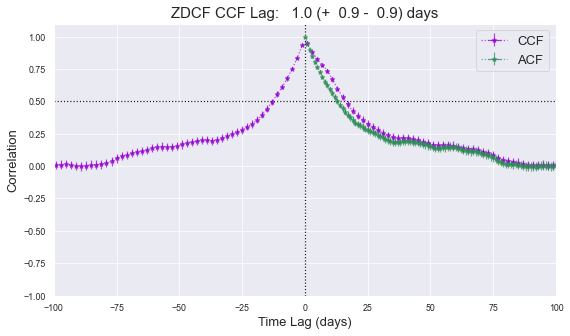

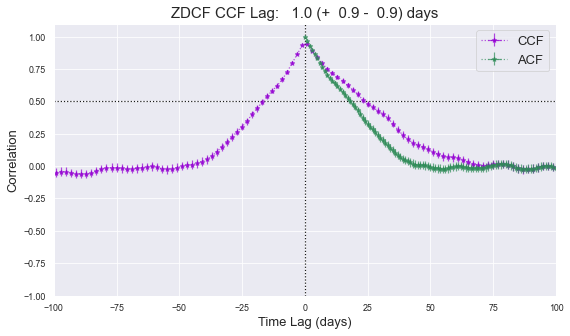

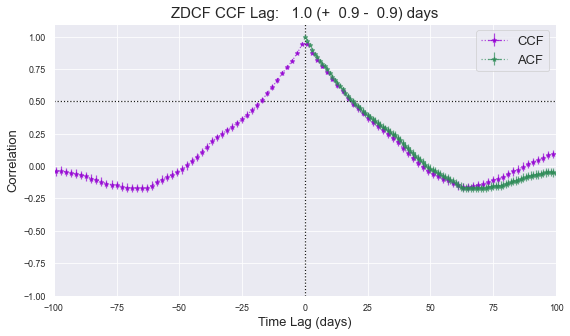

In [35]:
plot_CF('artificial_x_band_43', 'artificial_x_band_43_y_band_43', 0, 0, save=True, 
        save_filename='artificial_x_band_43_y_band_43', save_path='CCF_plots')

plot_CF('artificial_x_band_44', 'artificial_x_band_44_y_band_44', 1, 1, save=True, 
        save_filename='artificial_x_band_44_y_band_44', save_path='CCF_plots')

plot_CF('artificial_x_band_45', 'artificial_x_band_45_y_band_45', 2, 1, save=True, 
        save_filename='artificial_x_band_45_y_band_45', save_path='CCF_plots')

### Introducing Gaps

#### One every 5 days

In [66]:
x_band_43_5days = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_5days

,t,flux,err


In [67]:
y_band_43_5days = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_5days

,t,flux,err


In [69]:
counter = 1

while x_band_43_5days.shape[0] < 1000:
    x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_5days = y_band_43_5days.append(y_band_43.loc[y_band_43.t == counter])
    counter += 5

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2360899619.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2360899619.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_5days = y_band_43_5days.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2360899619.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_5days = x_band_43_5days.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2360899619.py:5: FutureWarning: The frame.ap

In [70]:
x_band_43_5days

,t,flux,err
0,1,0.935300,0.004836
5,6,0.948404,0.004869
10,11,0.957285,0.004892
15,16,0.926035,0.004812
20,21,0.907615,0.004763
...,...,...,...
4975,4976,0.929371,0.004820
4980,4981,0.921326,0.004799
4985,4986,0.929081,0.004819
4990,4991,0.955579,0.004888


In [71]:
y_band_43_5days

,t,flux,err
0,1,0.935300,0.005141
5,6,0.945801,0.005170
10,11,0.953407,0.005191
15,16,0.930952,0.005129
20,21,0.916619,0.005090
...,...,...,...
4975,4976,0.932311,0.005133
4980,4981,0.928451,0.005123
4985,4986,0.928847,0.005124
4990,4991,0.948540,0.005178


In [77]:
'''np.savetxt('x_band_43_5days', np.c_[x_band_43_5days.t, x_band_43_5days.flux, x_band_43_5days.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_5days', np.c_[y_band_43_5days.t, y_band_43_5days.flux, y_band_43_5days.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

#### Month on and off

In [84]:
x_band_43_month = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_month

,t,flux,err


In [85]:
y_band_43_month = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_month

,t,flux,err


In [86]:
counter = 1

while x_band_43_month.shape[0] < 1000:
    x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
    
    if counter % 30 == 0:
        counter += 31
    else:
        counter += 1

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
121
122
123
124
125
126
127
128
129
130
131
132


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

203
204
205
206
207
208
209
210
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

377
378
379
380
381
382
383
384
385
386
387
388
389
390
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
541


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

686
687
688
689
690
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
841
842
843
844
845
846
847
848
849
850
851
852
853


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
1021
1022
1023
1024
1025
1026
1027
1028


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1201
1202
1203

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap


1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

1348
1349
1350
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1621
1622
1623
1624
1625
1626
1627
1628


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.ap

1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

1770
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991


/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_month = x_band_43_month.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_month = y_band_43_month.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/2960739345.py:4: FutureWarning: The frame.ap

In [87]:
x_band_43_month

,t,flux,err
0,1,0.935300,0.004836
1,2,0.938463,0.004844
2,3,0.937414,0.004841
3,4,0.941332,0.004851
4,5,0.950695,0.004875
...,...,...,...
1985,1986,0.945654,0.004862
1986,1987,0.948589,0.004870
1987,1988,0.952629,0.004880
1988,1989,0.955326,0.004887


In [88]:
y_band_43_month

,t,flux,err
0,1,0.935300,0.005141
1,2,0.937831,0.005148
2,3,0.936992,0.005146
3,4,0.940129,0.005155
4,5,0.947624,0.005175
...,...,...,...
1985,1986,0.946463,0.005172
1986,1987,0.949340,0.005180
1987,1988,0.952900,0.005190
1988,1989,0.954880,0.005195


In [89]:
'''np.savetxt('x_band_43_month', np.c_[x_band_43_month.t, x_band_43_month.flux, x_band_43_month.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_month', np.c_[y_band_43_month.t, y_band_43_month.flux, y_band_43_month.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

#### Months by 3 and 6

three month of observations every day

followed by six months of observations with a frequency of once per month

then a gap of three months

In [91]:
x_band_43_lgaps = pd.DataFrame(columns=['t', 'flux', 'err'])
x_band_43_lgaps  # lgaps for long gaps

,t,flux,err


In [92]:
y_band_43_lgaps = pd.DataFrame(columns=['t', 'flux', 'err'])
y_band_43_lgaps

,t,flux,err


In [93]:
counter = 1

while x_band_43_lgaps.shape[0] < 1000:
    x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
    y_band_43_lgaps = y_band_43_lgaps.append(y_band_43.loc[y_band_43.t == counter])
    
    if counter % 90 == 0:  # after three months
        counter += 31  # frequency of once per month
    elif counter % 180 == 0:  # after six months
        counter += 91
    else:
        counter += 1

/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/4058620464.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/4058620464.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_band_43_lgaps = y_band_43_lgaps.append(y_band_43.loc[y_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/4058620464.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_band_43_lgaps = x_band_43_lgaps.append(x_band_43.loc[x_band_43.t == counter])
/var/folders/4p/v__jd9j130zd_7rgklpj3h380000gn/T/ipykernel_10786/4058620464.py:5: FutureWarning: The frame.ap

In [94]:
x_band_43_lgaps

,t,flux,err
0,1,0.935300,0.004836
1,2,0.938463,0.004844
2,3,0.937414,0.004841
3,4,0.941332,0.004851
4,5,0.950695,0.004875
...,...,...,...
1475,1476,0.952723,0.004880
1476,1477,0.956148,0.004889
1477,1478,0.954425,0.004885
1478,1479,0.956106,0.004889


In [96]:
y_band_43_lgaps

,t,flux,err
0,1,0.935300,0.005141
1,2,0.937831,0.005148
2,3,0.936992,0.005146
3,4,0.940129,0.005155
4,5,0.947624,0.005175
...,...,...,...
1475,1476,0.954527,0.005194
1476,1477,0.957877,0.005203
1477,1478,0.956537,0.005199
1478,1479,0.957550,0.005202


In [97]:
'''np.savetxt('x_band_43_lgaps', np.c_[x_band_43_lgaps.t, x_band_43_lgaps.flux, x_band_43_lgaps.err], 
           fmt=['%.1f','%.7e','%.7e'])
np.savetxt('y_band_43_lgaps', np.c_[y_band_43_lgaps.t, y_band_43_lgaps.flux, y_band_43_lgaps.err], 
           fmt=['%.1f','%.7e','%.7e'])'''

#### Time-Lags with PLIKE

In [ ]:
auto_corr = True
out_file_name = 'output_ZDCF/ZDCF_output_ACF_art_lcs_cadence.csv'

results = []

results.append(do_zdcf('artificial', 'x_band_43', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_44', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_45', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_43', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_44', acf_or_ccf='ACF', uniform='y'))
results.append(do_zdcf('artificial', 'y_band_45', acf_or_ccf='ACF', uniform='y'))

head = 'object_name', 'lc_1', 'lc_2', 'lag_peak', 'lag_lowerr', 'lag_uperr', 'r_peak'

art_lcs_zdcf_plike_df = pd.DataFrame(results, columns=head)

art_lcs_zdcf_plike_df.to_csv(out_file_name)

print("File %s writen" % (out_file_name))
print(results)

In [ ]:
auto_corr = False
out_file_name = 'output_ZDCF/ZDCF_output_CCF_art_lcs_cadence.csv'

results = []

results.append(do_zdcf('artificial', 'x_band_43', lc2_name='y_band_43', acf_or_ccf='CCF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_44', lc2_name='y_band_44', acf_or_ccf='CCF', uniform='y'))
results.append(do_zdcf('artificial', 'x_band_45', lc2_name='y_band_45', acf_or_ccf='CCF', uniform='y'))

head = 'object_name', 'lc_1', 'lc_2', 'lag_peak', 'lag_lowerr', 'lag_uperr', 'r_peak'

art_lcs_zdcf_plike_df = pd.DataFrame(results, columns=head)

art_lcs_zdcf_plike_df.to_csv(out_file_name)

print("File %s writen" % (out_file_name))
print(results)